#  Student Exam Scores Prediction

### Problem statement:

With the proliferation of data-driven methodologies in education, institutions are turning to predictive analytics to support student achievement and optimize resource allocation. Underperforming students face diminished academic and career prospects, and schools incur significant costs addressing remediation and dropout prevention. Early and accurate prediction of exam performance is therefore essential to enable timely, targeted interventions. In this project, we develop a machine learning pipeline that leverages features such as hours studied, attendance rates, and past grades to forecast student exam scores with high precision. Our objective is to provide educators with actionable insights that facilitate personalized support and improve overall educational outcomes.

#### In this project (3-4 in this notebook):

1. Exploratory Data Analysis will be performed to figure out features with the most correlation to student exam scores. 


2. Custom **Linear Regression** (Mini-batch Gradient Descent) and **k-Nearest Neighbors** Regression models will be implemented **from scratch** to predict student performance. (You can find this in src/models.py)


3. Models' hyperparameters will be tuned to achieve the ultimate prediction performance. 


4. Both models will be benchmarked using k-fold cross-validation via mean absolute error (MAE) and R² to determine the top performer.

## Setup

In [1]:
import numpy as np
from src.preprocess import load_data, preprocess_data
from src.models import LinearRegression, KNNRegression
from src.evaluation import evaluate, test_hyperparameter, plot_hyperparameter

In [2]:
df = load_data('../data/students_performance.zip')
X, y = preprocess_data(df)
X.head()

,Attendance,Hours_Studied,Access_to_Resources_Low,Access_to_Resources_Medium,Parental_Involvement_Low,Parental_Involvement_Medium,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes
0,0.348375,0.504942,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.383736,-0.162822,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.560853,0.671882,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.781403,1.506587,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.041220,-0.162822,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

## Out of the box performance assessment

In [4]:
from sklearn.linear_model import LinearRegression as SKLinear

models = {
    'SKLearn LinearRegression': SKLinear(),
    'MiniBatch GD LinearRegression': LinearRegression(
                                     learning_rate=1e-3,
                                     epochs=200
    ),
    'KNNRegression (k=3)': KNNRegression(k=3)
}

k = 5
maes, r2s = evaluate(models, k, X, y)

for name in models:
    print(f"--- {name} ---")
    print(f"Average MAE across {k} folds: {np.mean(maes[name]):.4f}")
    print(f"Average R^2 across {k} folds: {np.mean(r2s[name]):.3f}\n") 

--- SKLearn LinearRegression ---
Average MAE across 5 folds: 1.1994
Average R^2 across 5 folds: 0.636

--- MiniBatch GD LinearRegression ---
Average MAE across 5 folds: 1.2726
Average R^2 across 5 folds: 0.618

--- KNNRegression (k=3) ---
Average MAE across 5 folds: 1.5358
Average R^2 across 5 folds: 0.506



The models are looking pretty good compared to the baseline SKlearn model considering there was no tuning yet.

## Hyperparameters tuning

### Linear regression tuning

Here we can tune learning rate, batch size and # of epochs. Let's do some tuning!

#### Learning rate


Testing learning_rate=0.1: MAE=1.2574
Testing learning_rate=0.01: MAE=1.1530
Testing learning_rate=0.001: MAE=1.1545
Testing learning_rate=0.0001: MAE=2.4377
Testing learning_rate=1e-05: MAE=7.9472


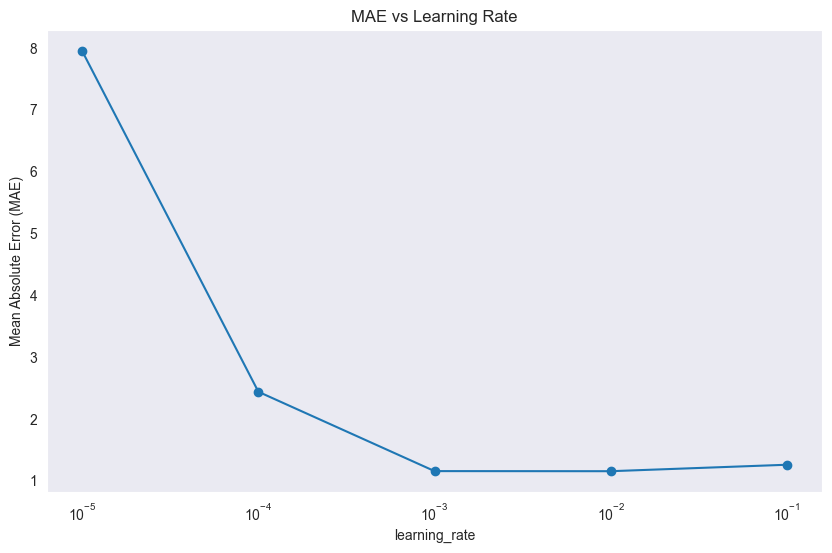

In [5]:
# Tuning learning rate!

learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
batch_size = 32
epochs = 1000

params = {
        'learning_rate':learning_rates[0],
        'epochs':epochs,
        'batch_size':batch_size,
}

to_tune = 'learning_rate'

results = test_hyperparameter(params, to_tune, learning_rates, LinearRegression, X, y)

plot_hyperparameter(learning_rates, results, to_tune, 'MAE vs Learning Rate', x_log=True)

10^-3 looks like a good balance between precision and speed

#### Batch size


Testing batch_size=8: MAE=1.1561
Testing batch_size=16: MAE=1.1579
Testing batch_size=32: MAE=1.1550
Testing batch_size=64: MAE=1.1551
Testing batch_size=128: MAE=1.1556


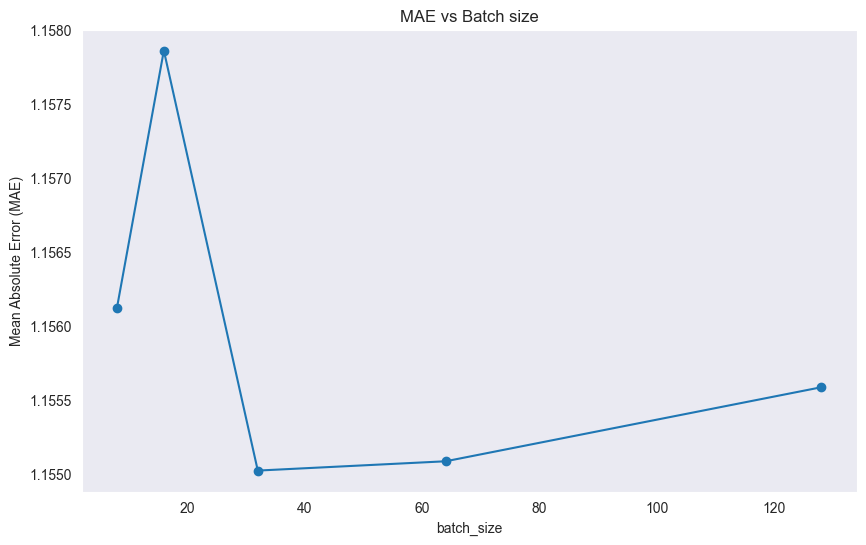

In [6]:
# Tuning batch size!

learning_rate = 1e-3
epochs = 1500
batch_sizes = [8, 16, 32, 64, 128]

params = {
        'learning_rate':learning_rate,
        'epochs':epochs,
        'batch_size':batch_sizes[0],
}

to_tune = 'batch_size'

results = test_hyperparameter(params, to_tune, batch_sizes, LinearRegression, X, y)

plot_hyperparameter(batch_sizes, results, to_tune, 'MAE vs Batch size')

The difference between batch sizes isn't statistically significant, as long as you don't choose a value too small or too big. I'll stick with 32 here.

#### Epochs count

Testing epochs=250: MAE=1.1843
Testing epochs=300: MAE=1.1619
Testing epochs=500: MAE=1.1549
Testing epochs=1000: MAE=1.1545
Testing epochs=1500: MAE=1.1545
Testing epochs=2000: MAE=1.1552
Testing epochs=2500: MAE=1.1548
Testing epochs=3000: MAE=1.1555


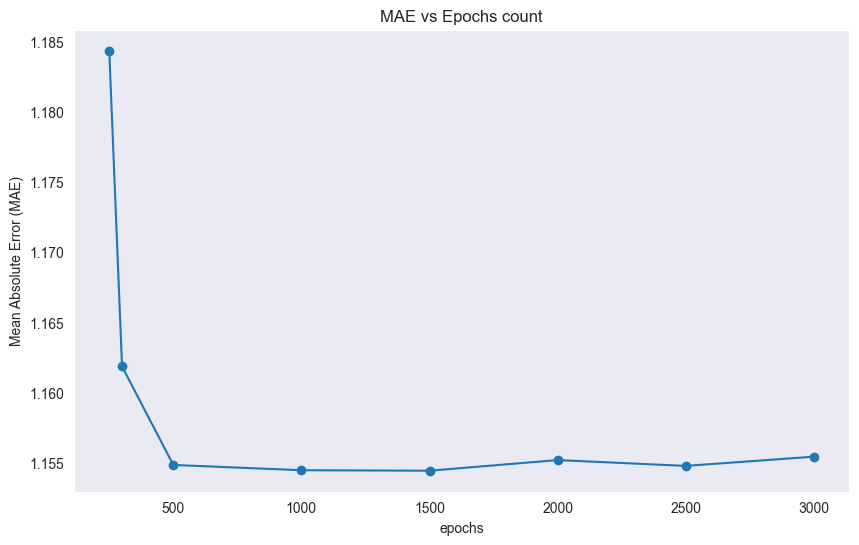

In [7]:
# Tuning # of epochs!

learning_rate = 1e-3
batch_size = 32
epochs = [250, 300, 500, 1000, 1500, 2000, 2500, 3000]

params = {
        'learning_rate':learning_rate,
        'epochs':epochs[0],
        'batch_size':batch_size,
}

to_tune = 'epochs'


results = test_hyperparameter(params, to_tune, epochs, LinearRegression, X, y)

plot_hyperparameter(epochs, results, to_tune, 'MAE vs Epochs count')

The regression seems to converge after 500 epochs. I'll keep 1000 in case the number is bigger in other folds.

### K-nearest neighbours tuning
Here we can only tune the k

Testing k=3: MAE=1.5030
Testing k=5: MAE=1.4609
Testing k=7: MAE=1.4401
Testing k=10: MAE=1.4142
Testing k=15: MAE=1.3730
Testing k=20: MAE=1.3508
Testing k=25: MAE=1.3345
Testing k=30: MAE=1.3284
Testing k=35: MAE=1.3293
Testing k=40: MAE=1.3331
Testing k=45: MAE=1.3281
Testing k=50: MAE=1.3350


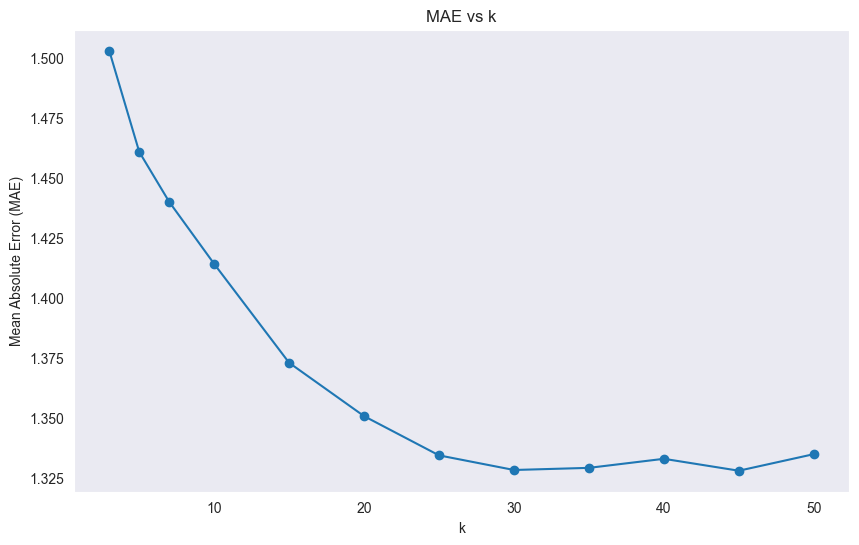

In [8]:
# Tuning k value!

k_grid = [3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50] 
params = {
    'k': k_grid[0],
}

to_tune = 'k'

knn_results = test_hyperparameter(params, to_tune, k_grid, KNNRegression, X, y) 

plot_hyperparameter(k_grid, knn_results, to_tune, 'MAE vs k', x_log=False)

Let's stick with 30 here

## K-fold cross-validation

MAE and R^2 benchmarks

In [9]:
k = 5  # Number of folds

models = {
    'SKLearn LinearRegression': SKLinear(),
    'MiniBatch GD LinearRegression': LinearRegression(
                                     learning_rate=1e-3,
                                     batch_size=32,
                                     epochs=1000
                                ),
    'KNNRegression (k=30)': KNNRegression(k=30)
}

mae_scores, r_squared = evaluate(models, k, X, y)

for name in models:
    print(f"--- {name} ---")
    print(f"Average MAE across {k} folds: {np.mean(mae_scores[name]):.4f}")
    print(f"Average R^2 across {k} folds: {np.mean(r_squared[name]):.3f}\n") 

--- SKLearn LinearRegression ---
Average MAE across 5 folds: 1.1994
Average R^2 across 5 folds: 0.636

--- MiniBatch GD LinearRegression ---
Average MAE across 5 folds: 1.1992
Average R^2 across 5 folds: 0.636

--- KNNRegression (k=30) ---
Average MAE across 5 folds: 1.3699
Average R^2 across 5 folds: 0.596



# Conclusion
Both the built-in scikit-learn LinearRegression and our custom mini-batch gradient descent implementation delivered identical results under 5-fold cross-validation, achieving an average MAE of 1.199 and R² of 0.636. This confirms that the custom solver is correct and reaches the same optimum as the closed-form solution.

The KNN regressor with k = 30 was less accurate, with an average MAE of 1.370 and R² of 0.596, showing that a global linear relationship among attendance and study hours explains more variance than local averaging in this dataset.

A well-tuned linear model therefore offers the best combination of prediction accuracy, interpretability and efficiency for forecasting exam scores here.

